## Test a random forest model on full dataset

In [1]:
## Python packages - you may have to pip install sqlalchemy, sqlalchemy_utils, and psycopg2.

import pandas as pd
# Make the graphs a bit prettier, and bigger
pd.set_option('display.mpl_style', 'default')

# This is necessary to show lots of columns in pandas 0.12. 
# Not necessary in pandas 0.13.
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60)
pd.set_option('display.max_rows', 20)

import numpy as np
import math
# The usual preamble
%matplotlib inline
%pylab inline
import matplotlib.pyplot as plt
plt.rcParams['axes.color_cycle'] = ['r', 'g', 'b', 'c']
plt.rcParams['lines.color'] = 'r'
plt.rcParams['figure.figsize'] = (15, 5)

import process
from modeling import categorize

Populating the interactive namespace from numpy and matplotlib


/Users/along528/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


Load in dataset

In [2]:
test_data,val_data = process.get_split_add_data()
val_data

,urban,rural,institutionalized_all,institutionalized_adult_all,institutionalized_adult_federal_detention_all,institutionalized_adult_federal_prison_all,institutionalized_adult_state_prison_all,institutionalized_adult_local_jail_all,institutionalized_juvenile_all,institutionalized_white,institutionalized_adult_white,institutionalized_adult_federal_detention_white,institutionalized_adult_federal_prison_white,institutionalized_adult_state_prison_white,institutionalized_adult_local_jail_white,institutionalized_juvenile_white,institutionalized_black,institutionalized_adult_black,institutionalized_adult_federal_detention_black,institutionalized_adult_federal_prison_black,institutionalized_adult_state_prison_black,institutionalized_adult_local_jail_black,institutionalized_juvenile_black,population_white,population_black,total_income_estimate_all,total_income_estimate_white,total_income_estimate_black,swnauthemp,swnftemp,...,chiefmin_per_capita,chiefmax_per_capita,sgtmin_per_capita,sgtmax_per_capita,entrymin_per_capita,entrymax_per_capita,nummrkcars_per_capita,numothmrk_per_capita,numumkcars_per_capita,numothunm_per_capita,numplanes_per_capita,numcopters_per_capita,numboats_per_capita,nummotor_per_capita,numcarcam_per_capita,numfixcam_per_capita,nummobcam_per_capita,rpsi,black_over_white_population_disparity,black_over_white_income_disparity,black_over_white_institutionalized_disparity,black_over_white_institutionalized_adult_disparity,black_over_white_institutionalized_adult_federal_detention_disparity,black_over_white_institutionalized_adult_federal_prison_disparity,black_over_white_institutionalized_adult_state_prison_disparity,black_over_white_institutionalized_adult_local_jail_disparity,black_over_white_institutionalized_juvenile_disparity,black_officer_disparity,white_officer_disparity,black_over_white_officer_disparity
surveyid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1222,26616,31,186,0,0,0,0,0,13,144,0,0,0,0,0,5,37,0,0,0,0,0,6,24649,323,9712,9063,35,65,65,...,4.943333,4.943333,2.824183,2.965287,1.670695,2.456337,0.000675,0.000150,0.000450,0.000150,0,0.000000,0.000075,0.000038,0.000075,0.000525,0.000000,3.067020,0.013104,0.003862,0.256944,1.000000,1,1.000000,1.000000,1.000000,1.200000,0.000000,1.031163,0.000000
184,110372,0,1149,219,0,0,0,0,44,861,83,0,0,0,0,23,209,82,0,0,0,0,13,64836,22146,40950,26944,7822,300,300,...,0.987569,1.032871,0.576197,0.587504,0.406117,0.414127,0.001196,0.000190,0.000734,0.000136,0,0.000000,0.000000,0.000082,0.000000,0.000027,0.000027,1.356672,0.341569,0.290306,0.242741,0.987952,1,1.000000,1.000000,1.000000,0.565217,0.348868,1.361861,0.256170
175,123919,0,2194,1277,0,0,0,1095,119,1027,378,0,0,0,309,46,683,512,0,0,0,436,46,36606,48114,46061,17050,17580,592,417,...,0.960305,1.129770,0.541951,0.579822,0.331822,0.499568,0.001477,0.000234,0.000912,0.000169,0,0.000000,0.000024,0.000105,0.000347,0.000016,0.000000,1.708121,1.314375,1.031085,0.665044,1.354497,1,1.000000,1.000000,1.411003,1.000000,0.389109,2.118801,0.183646
170,78229,2653,1904,1341,0,1339,0,0,25,1162,637,0,637,0,0,17,434,406,0,406,0,0,7,55191,5803,29034,21017,1763,152,148,...,1.319354,1.344082,0.831322,0.856433,0.596734,0.765881,0.000519,0.000111,0.000334,0.000074,0,0.000000,0.000012,0.000000,0.000000,0.000000,0.000000,1.210668,0.105144,0.083884,0.373494,0.637363,1,0.637363,1.000000,1.000000,0.411765,0.376702,1.307061,0.288205
174,59531,1435,427,0,0,0,0,0,82,363,0,0,0,0,0,43,53,0,0,0,0,0,28,41750,12292,23342,16691,4492,107,101,...,1.512157,1.512157,1.170128,1.170128,0.796690,1.060739,0.000377,0.000098,0.000328,0.000066,0,0.000000,0.000000,0.000066,0.000197,0.000000,0.000016,2.385800,0.294419,0.269127,0.146006,1.000000,1,1.000000,1.000000,1.000000,0.651163,0.147321,1.359057,0.108400
179,73240,0,790,0,0,0,0,0,59,673,0,0,0,0,0,34,59,0,0,0,0,0,14,46607,9530,27832,19961,2811,160,172,...,1.256144,1.392682,0.881649,1.089364,0.666562,0.887862,0.000410,0.000137,0.000164,0.000096,0,0.000000,0.000000,0.000055,0.000000,0.000000,0.0000

In [3]:
val_data.to_sql('val_data',process.engine,if_exists='replace')



In [4]:
val_data

,urban,rural,institutionalized_all,institutionalized_adult_all,institutionalized_adult_federal_detention_all,institutionalized_adult_federal_prison_all,institutionalized_adult_state_prison_all,institutionalized_adult_local_jail_all,institutionalized_juvenile_all,institutionalized_white,institutionalized_adult_white,institutionalized_adult_federal_detention_white,institutionalized_adult_federal_prison_white,institutionalized_adult_state_prison_white,institutionalized_adult_local_jail_white,institutionalized_juvenile_white,institutionalized_black,institutionalized_adult_black,institutionalized_adult_federal_detention_black,institutionalized_adult_federal_prison_black,institutionalized_adult_state_prison_black,institutionalized_adult_local_jail_black,institutionalized_juvenile_black,population_white,population_black,total_income_estimate_all,total_income_estimate_white,total_income_estimate_black,swnauthemp,swnftemp,...,chiefmin_per_capita,chiefmax_per_capita,sgtmin_per_capita,sgtmax_per_capita,entrymin_per_capita,entrymax_per_capita,nummrkcars_per_capita,numothmrk_per_capita,numumkcars_per_capita,numothunm_per_capita,numplanes_per_capita,numcopters_per_capita,numboats_per_capita,nummotor_per_capita,numcarcam_per_capita,numfixcam_per_capita,nummobcam_per_capita,rpsi,black_over_white_population_disparity,black_over_white_income_disparity,black_over_white_institutionalized_disparity,black_over_white_institutionalized_adult_disparity,black_over_white_institutionalized_adult_federal_detention_disparity,black_over_white_institutionalized_adult_federal_prison_disparity,black_over_white_institutionalized_adult_state_prison_disparity,black_over_white_institutionalized_adult_local_jail_disparity,black_over_white_institutionalized_juvenile_disparity,black_officer_disparity,white_officer_disparity,black_over_white_officer_disparity
surveyid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1222,26616,31,186,0,0,0,0,0,13,144,0,0,0,0,0,5,37,0,0,0,0,0,6,24649,323,9712,9063,35,65,65,...,4.943333,4.943333,2.824183,2.965287,1.670695,2.456337,0.000675,0.000150,0.000450,0.000150,0,0.000000,0.000075,0.000038,0.000075,0.000525,0.000000,3.067020,0.013104,0.003862,0.256944,1.000000,1,1.000000,1.000000,1.000000,1.200000,0.000000,1.031163,0.000000
184,110372,0,1149,219,0,0,0,0,44,861,83,0,0,0,0,23,209,82,0,0,0,0,13,64836,22146,40950,26944,7822,300,300,...,0.987569,1.032871,0.576197,0.587504,0.406117,0.414127,0.001196,0.000190,0.000734,0.000136,0,0.000000,0.000000,0.000082,0.000000,0.000027,0.000027,1.356672,0.341569,0.290306,0.242741,0.987952,1,1.000000,1.000000,1.000000,0.565217,0.348868,1.361861,0.256170
175,123919,0,2194,1277,0,0,0,1095,119,1027,378,0,0,0,309,46,683,512,0,0,0,436,46,36606,48114,46061,17050,17580,592,417,...,0.960305,1.129770,0.541951,0.579822,0.331822,0.499568,0.001477,0.000234,0.000912,0.000169,0,0.000000,0.000024,0.000105,0.000347,0.000016,0.000000,1.708121,1.314375,1.031085,0.665044,1.354497,1,1.000000,1.000000,1.411003,1.000000,0.389109,2.118801,0.183646
170,78229,2653,1904,1341,0,1339,0,0,25,1162,637,0,637,0,0,17,434,406,0,406,0,0,7,55191,5803,29034,21017,1763,152,148,...,1.319354,1.344082,0.831322,0.856433,0.596734,0.765881,0.000519,0.000111,0.000334,0.000074,0,0.000000,0.000012,0.000000,0.000000,0.000000,0.000000,1.210668,0.105144,0.083884,0.373494,0.637363,1,0.637363,1.000000,1.000000,0.411765,0.376702,1.307061,0.288205
174,59531,1435,427,0,0,0,0,0,82,363,0,0,0,0,0,43,53,0,0,0,0,0,28,41750,12292,23342,16691,4492,107,101,...,1.512157,1.512157,1.170128,1.170128,0.796690,1.060739,0.000377,0.000098,0.000328,0.000066,0,0.000000,0.000000,0.000066,0.000197,0.000000,0.000016,2.385800,0.294419,0.269127,0.146006,1.000000,1,1.000000,1.000000,1.000000,0.651163,0.147321,1.359057,0.108400
179,73240,0,790,0,0,0,0,0,59,673,0,0,0,0,0,34,59,0,0,0,0,0,14,46607,9530,27832,19961,2811,160,172,...,1.256144,1.392682,0.881649,1.089364,0.666562,0.887862,0.000410,0.000137,0.000164,0.000096,0,0.000000,0.000000,0.000055,0.000000,0.000000,0.0000

# Build Model

In [5]:
processor = process.Processor(val_data)
X_val,y_val_cat = processor.get_scaled_Xy(val_data)
X_test,y_test_cat = processor.get_scaled_Xy(test_data)

In [6]:
len(val_data)

147

In [7]:
val_data_scaled = pd.DataFrame(np.c_[X_val,y_val_cat],index=val_data.index,columns=val_data.drop('rpsi',1).columns.tolist()+['rpsi'])
val_data_scaled.to_sql('val_data_scaled',process.engine,if_exists='replace')#print X_val+y_val

(array([ 19.,  20.,  27.,  18.,  16.,   6.,  13.,  12.,   4.,   2.,   4.,
          1.,   1.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   1.,   1.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([  0.94214049,   1.21256609,   1.48299169,   1.75341729,
          2.02384289,   2.29426849,   2.56469409,   2.83511969,
          3.10554528,   3.37597088,   3.64639648,   3.91682208,
          4.18724768,   4.45767328,   4.72809888,   4.99852448,
          5.26895008,   5.53937567,   5.80980127,   6.08022687,
          6.35065247,   6.62107807,   6.89150367,   7.16192927,
          7.43235487,   7.70278047,   7.97320606,   8.24363166,
          8.51405726,   8.78448286,   9.05490846,   9.32533406,
          9.59575966,   9.86618526,  10.13661085,  10.40703645,
         10.67746205,  10.94788765,  11.21831325,  11.48873885,  11.75916445]),
 <a list of 40 Patch objects>)

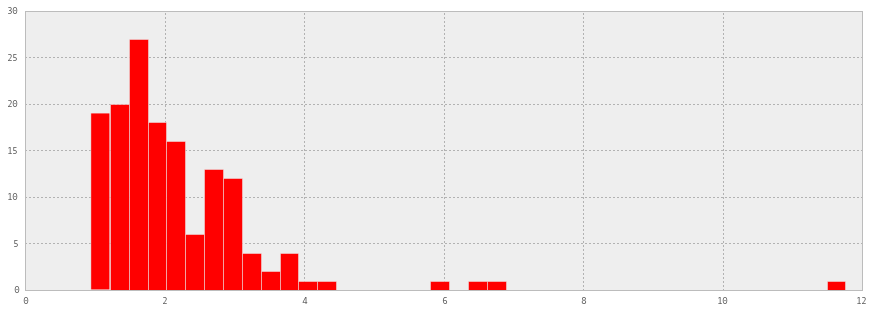

In [8]:
plt.hist(val_data['rpsi'].tolist(),bins=40)

In [9]:
for cat in sort(val_data_scaled['rpsi'].unique().tolist()):
    
    print cat, shape(val_data_scaled[val_data_scaled['rpsi']==cat])[0]

0.0 25
1.0 80
2.0 42


In [10]:
from sklearn import linear_model,cross_validation,metrics,grid_search

from sklearn.ensemble import RandomForestClassifier
values = range(10,80,10)
n_iter = len(values)
param_grid = {'n_estimators': values,
             'max_features': values}
clf = RandomForestClassifier(n_jobs=2)
clfmodel = grid_search.RandomizedSearchCV(clf,param_grid,
                                          n_iter*n_iter,cv=5,verbose=1,random_state=2)
clfmodel.fit(X_val,y_val_cat)

[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:   18.7s
[Parallel(n_jobs=1)]: Done 199 tasks       | elapsed:  1.3min


Fitting 5 folds for each of 49 candidates, totalling 245 fits


[Parallel(n_jobs=1)]: Done 245 out of 245 | elapsed:  1.6min finished


RandomizedSearchCV(cv=5, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params={}, iid=True, n_iter=49, n_jobs=1,
          param_distributions={'n_estimators': [10, 20, 30, 40, 50, 60, 70], 'max_features': [10, 20, 30, 40, 50, 60, 70]},
          pre_dispatch='2*n_jobs', random_state=2, refit=True,
          scoring=None, verbose=1)

In [11]:
print clfmodel.best_params_
print clfmodel.best_score_
features = []
importances = []
for feature,importance in zip(val_data.drop('rpsi',1).columns.tolist(),clfmodel.best_estimator_.feature_importances_):
    #print feature,importance
    features.append(feature)
    importances.append(importance)
indices = [i[0] for i in sorted(enumerate(importances), key=lambda x:x[1])]
best_feature_names = []
for index in reversed(indices):
    print features[index],importances[index]
    if importances[index] < 0.005:
        continue
    best_feature_names.append(features[index])
print len(best_feature_names)

{'n_estimators': 70, 'max_features': 60}
0.56462585034
totacad 0.075464931426
sgtmin 0.0438220081159
rural 0.0421988142978
entrymin 0.037980580998
sgtmax 0.0345337798398
opbudget_per_capita 0.0257912720424
total_income_estimate_all_per_capita 0.0214590187264
black_over_white_institutionalized_disparity 0.0212322351654
entrymax 0.0182442669251
total_income_estimate_white_per_capita 0.0181613940619
institutionalized_juvenile_white 0.01509025783
numsro_per_capita 0.0122682197504
urban_per_capita 0.0118983983282
totinsrv 0.011814942813
numothmrk_per_capita 0.0113795097969
institutionalized_juvenile_all_per_capita 0.0111552878683
black_over_white_income_disparity 0.0107379719835
numumkcars_per_capita 0.0106477785871
chiefmax 0.010192049638
civptemp_per_capita 0.010039654939
total_income_estimate_black_per_capita 0.00988262744329
female_per_capita 0.00983954287866
numcarcam_per_capita 0.00931457514232
totftemp_per_capita 0.00918554648503
drugforf_per_capita 0.00917417389231
institutionalized

In [ ]:
import pickle
pickle.dump(best_feature_names,open('best_features_names.p','wb'))


In [ ]:
import pickle
best_feature_names = pickle.load(open('best_features_names.p','rb'))
print best_feature_names

In [12]:
processor = process.Processor(val_data[best_feature_names+['rpsi']])
X_val,y_val_cat = processor.get_scaled_Xy(val_data[best_feature_names+['rpsi']])
X_test,y_test_cat = processor.get_scaled_Xy(test_data[best_feature_names+['rpsi']])



In [13]:
from sklearn.ensemble import RandomForestClassifier
values = range(10,shape(X_val)[1],5)
n_iter = len(values)
param_grid = {'n_estimators': values,
             'max_features': values}
clf2 = RandomForestClassifier()
clfmodel2 = grid_search.RandomizedSearchCV(clf2,param_grid,
                                          n_iter*n_iter,cv=5,verbose=1,random_state=2)
clfmodel2.fit(X_val,y_val_cat)
print clfmodel2.best_params_
print clfmodel2.best_score_

[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    6.3s
[Parallel(n_jobs=1)]: Done 199 tasks       | elapsed:   26.9s
[Parallel(n_jobs=1)]: Done 449 tasks       | elapsed:  1.2min
[Parallel(n_jobs=1)]: Done 605 out of 605 | elapsed:  1.7min finished


Fitting 5 folds for each of 121 candidates, totalling 605 fits
{'n_estimators': 20, 'max_features': 15}
0.578231292517


In [14]:
est =  clfmodel2.best_estimator_
print est

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=15, max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


In [ ]:
import pickle
pickle.dump(est,open('randomforestclassifier_fixed.p','wb'))

In [ ]:
est = pickle.load(open('randomforestclassifier_fixed.p','rb'))
print est

In [15]:
#classification
nmatch = 0
total = 0
for prediction, actual, ismatch in zip(est.predict(X_test),y_test_cat,est.predict(X_test)==y_test_cat):
    if ismatch:
        nmatch+=1
    total+=1

print "test accuracy =",float(nmatch)/float(total)
print "total",total

test accuracy = 0.694444444444
total 36


array([[ 1,  2,  1],
       [ 1, 21,  3],
       [ 0,  4,  3]])

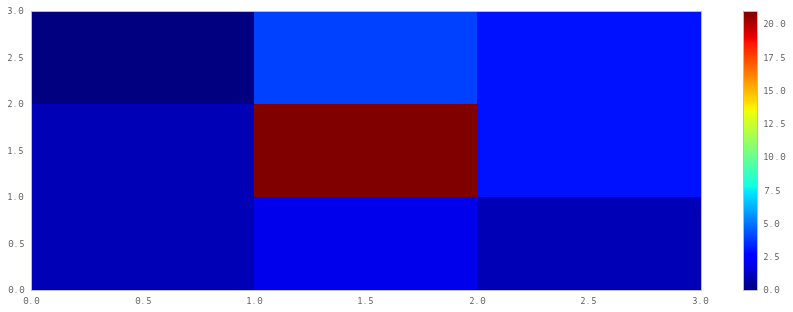

In [16]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test_cat,clfmodel2.predict(X_test))
plt.pcolor(matrix.T.T)
plt.colorbar()
matrix

In [ ]:
sql_query = """
    SELECT  * FROM traffic_joined_with_features;
    """
data = add_features(get_data())

descriptors = []
descriptors = ['agency','city','state','zipcode']
test = pd.read_sql_query(sql_query,con).drop('index',axis=1)
test = test[test['surveyid'].isin(data.index.tolist())]
#test = test.merge(data,how='right',right_on='surveyid')
#data = add_features(get_data())[best_feature_names+['agency']]
#test
test = test.sort(columns='surveyid').set_index('surveyid',drop=True)
test = test[descriptors]
test
sorted_data = data.sort_index()
sorted_data = sorted_data[best_feature_names]
output = pd.concat([test,sorted_data],axis=1)
output

In [ ]:
import pickle
#clf = pickle.load(open('randomforestclassifier.p','rb'))
best_feature_names = pickle.load(open('best_features_names.p','rb'))

In [ ]:
plt.pcolor(np.abs(np.corrcoef((X_val.T))))
plt.colorbar()